# Credit Card Approval
Bank customers apply for credit cards. But not everyone can get a credit card for a number of reasons, e.g a person may not earn enough money or may have a loan from a bank that they have to repay. Therefore, not everyone should get this credit card. The goal of this project is to create a model that allows for the acceptance and rejection of applications.

In [1]:
import pandas as pd
import numpy as np

#Charts
import matplotlib.pyplot as plt
import seaborn as sns

#Measuring the execution time of an algorithm
import time

columns=["Gender", "Age", "Debt", "Married", "BankCustomer", "EducationLevel", "Ethnicity", "YearsEmployed", "PriorDefault", 
         "Employed", "CreditScore", "DriversLicense", "Citizen", "ZipCode", "Income", "ApprovalStatus"]

df= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', 
                names=columns, header=None)

df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


# Information about data

In [2]:
print(df.describe())

print(df.info())

             Debt  YearsEmployed  CreditScore         Income
count  690.000000     690.000000    690.00000     690.000000
mean     4.758725       2.223406      2.40000    1017.385507
std      4.978163       3.346513      4.86294    5210.102598
min      0.000000       0.000000      0.00000       0.000000
25%      1.000000       0.165000      0.00000       0.000000
50%      2.750000       1.000000      0.00000       5.000000
75%      7.207500       2.625000      3.00000     395.500000
max     28.000000      28.500000     67.00000  100000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-nu

In [3]:
for column in df:
    print(column, sorted(df[column].unique()))  # Now we know that missing data is flagged "?"

Gender ['?', 'a', 'b']
Age ['13.75', '15.17', '15.75', '15.83', '15.92', '16.00', '16.08', '16.17', '16.25', '16.33', '16.50', '16.92', '17.08', '17.25', '17.33', '17.42', '17.50', '17.58', '17.67', '17.83', '17.92', '18.00', '18.08', '18.17', '18.25', '18.33', '18.42', '18.50', '18.58', '18.67', '18.75', '18.83', '18.92', '19.00', '19.17', '19.33', '19.42', '19.50', '19.58', '19.67', '19.75', '20.00', '20.08', '20.17', '20.25', '20.33', '20.42', '20.50', '20.67', '20.75', '20.83', '21.00', '21.08', '21.17', '21.25', '21.33', '21.42', '21.50', '21.58', '21.67', '21.75', '21.83', '21.92', '22.00', '22.08', '22.17', '22.25', '22.33', '22.42', '22.50', '22.58', '22.67', '22.75', '22.83', '22.92', '23.00', '23.08', '23.17', '23.25', '23.33', '23.42', '23.50', '23.58', '23.75', '23.92', '24.08', '24.17', '24.33', '24.42', '24.50', '24.58', '24.75', '24.83', '24.92', '25.00', '25.08', '25.17', '25.25', '25.33', '25.42', '25.50', '25.58', '25.67', '25.75', '25.83', '25.92', '26.00', '26.08', 

# Data preparation

In [4]:
df=df.replace('?', np.nan)
df.fillna(df.mean(), inplace=True)
df.isna().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

In [5]:
#filling in missing data

for column in df.columns:
    if df[column].dtypes == 'object':
        df.fillna(df[column].value_counts().index[0], inplace=True)
df.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [6]:
print('Number of rows with duplicates' ,df.shape[0])  #number of rows
df=df.drop_duplicates()
print('Number of rows without duplicates' ,df.shape[0])

Number of rows with duplicates 690
Number of rows without duplicates 690


In [7]:
df["ApprovalStatus"].replace({"+": 1, "-": 0}, inplace=True)
print(df["ApprovalStatus"])

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: ApprovalStatus, Length: 690, dtype: int64


Text(0.5, 1.0, 'Number of acceptances and rejections')

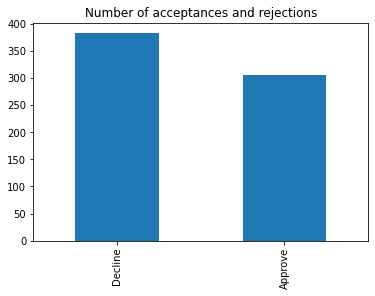

In [8]:
df["ApprovalStatus"].value_counts().plot.bar()
plt.xticks([0,1], ['Decline', 'Approve'])
plt.title('Number of acceptances and rejections')

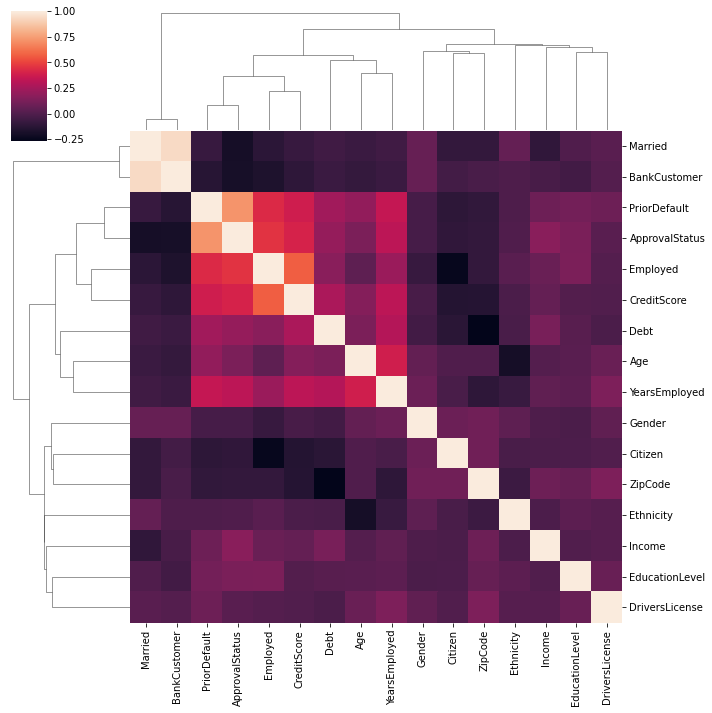

In [9]:
from sklearn.preprocessing import LabelEncoder

coder = LabelEncoder()

df2=df.copy()


for col in df2.columns:
    if df2[col].dtypes == 'object':
        df2[col]= coder.fit_transform(df2[col])

sns.clustermap(df2.corr())

In [10]:
df = df.drop(["DriversLicense", "ZipCode"], axis=1) #insignificant features
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,g,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,g,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,g,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,g,750,0


# Modeling

In [11]:
from sklearn.model_selection import train_test_split

X=df.drop(["ApprovalStatus"],axis=1).values
y=df["ApprovalStatus"].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# num=df.select_dtypes(include=['int64', 'float64']).columns.tolist()


# cat = df.select_dtypes(include=['object']).index.tolist()


#IMPORTANT!!! USING ColumnTransormer forces indexes, no names of columns.


df.info()

numerical=[2,7,10,12]  

categorical=[0,1,3,4,5,6,8,9,11]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  Citizen         690 non-null    object 
 12  Income          690 non-null    int64  
 13  ApprovalStatus  690 non-null    int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 80.9+ KB


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer  

    
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier



 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder    
    
    
    
    
classifiers = [
    DummyClassifier(strategy='stratified'),
    LogisticRegression(max_iter=500,solver='lbfgs'), # "solver='lbfgs" ~ in order for the algorithm to perform a specific number of iterations despite finding an optimal solution
    KNeighborsClassifier(2),
    ExtraTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    XGBClassifier(use_label_encoder=False,eval_metric='mlogloss'), # "use_label_encoder=False" ~ The use of label encoder in XGBClassifier is deprecated and will be removed in a future release."
    CatBoostClassifier(silent=True),
    LGBMClassifier(verbose=-1)
]

numeric_transformers = [StandardScaler(), MinMaxScaler(), Normalizer()]

categorical_transformers = [OrdinalEncoder(handle_unknown = 'ignore'), OneHotEncoder(handle_unknown = 'ignore')] 

#in case there is a coded value in the test set that was not in the training set ~ "handle_unknown = 'ignore'"

transformer_numerical=Pipeline(steps=[
    ('num_trans', None)
])

transformer_categorical=Pipeline(steps=[
    ('cat_trans', None)
])  

preprocessor=ColumnTransformer(transformers=[
    ('numerical', transformer_numerical, numerical),
    ('categorical', transformer_categorical, categorical)
])         
                                

In [13]:
%%time

from sklearn.metrics import confusion_matrix


pipe=Pipeline([('preprocessor', preprocessor),('classifier', None)])  


models_df = pd.DataFrame() #Space for scores

for model in classifiers:
    for num_trans in numeric_transformers:
        for cat_trans in categorical_transformers:
            
            pipe_params = {
                'preprocessor__numerical__num_trans': num_trans,
                'preprocessor__categorical__cat_trans': cat_trans,
                'classifier': model
            }
            
            
            pipe.set_params(**pipe_params)
            
            
            start_time = time.time()
                        
            pipe.fit(X_train, y_train)   
            
            end_time = time.time()
            
           
            
            
            score = pipe.score(X_test, y_test)
            
      
                    
            param_dict = {
                        'model': model.__class__.__name__,
                        'num_trans': num_trans.__class__.__name__,
                        'cat_trans': cat_trans.__class__.__name__,
                        'score': score,
                        'time_elapsed': end_time - start_time
            }
            
            models_df = models_df.append(pd.DataFrame(param_dict, index=[0]))
            
            
models_df.reset_index(drop=True, inplace=True)

DummyClassifier
[[67 43]
 [56 41]]
DummyClassifier
[[70 40]
 [55 42]]
DummyClassifier
[[71 39]
 [56 41]]
DummyClassifier
[[62 48]
 [56 41]]
DummyClassifier
[[65 45]
 [50 47]]
DummyClassifier
[[61 49]
 [50 47]]
LogisticRegression
[[90 20]
 [10 87]]
LogisticRegression
[[90 20]
 [10 87]]
LogisticRegression
[[89 21]
 [10 87]]
LogisticRegression
[[88 22]
 [ 9 88]]
LogisticRegression
[[90 20]
 [13 84]]
LogisticRegression
[[91 19]
 [10 87]]
KNeighborsClassifier
[[86 24]
 [69 28]]
KNeighborsClassifier
[[100  10]
 [ 33  64]]
KNeighborsClassifier
[[83 27]
 [68 29]]
KNeighborsClassifier
[[102   8]
 [ 29  68]]
KNeighborsClassifier
[[83 27]
 [68 29]]
KNeighborsClassifier
[[103   7]
 [ 30  67]]
ExtraTreeClassifier
[[92 18]
 [15 82]]
ExtraTreeClassifier
[[88 22]
 [22 75]]
ExtraTreeClassifier
[[87 23]
 [22 75]]
ExtraTreeClassifier
[[89 21]
 [18 79]]
ExtraTreeClassifier
[[96 14]
 [28 69]]
ExtraTreeClassifier
[[88 22]
 [17 80]]
RandomForestClassifier
[[97 13]
 [14 83]]
RandomForestClassifier
[[95 15]
 [

In [15]:
models_df.sort_values('score', ascending=False)

,model,num_trans,cat_trans,score,time_elapsed
24,RandomForestClassifier,StandardScaler,OrdinalEncoder,0.869565,0.127968
26,RandomForestClassifier,MinMaxScaler,OrdinalEncoder,0.869565,0.139872
45,CatBoostClassifier,MinMaxScaler,OneHotEncoder,0.864734,3.183610
44,CatBoostClassifier,MinMaxScaler,OrdinalEncoder,0.864734,1.669115
43,CatBoostClassifier,StandardScaler,OneHotEncoder,0.864734,3.148317
42,CatBoostClassifier,StandardScaler,OrdinalEncoder,0.864734,1.877604
39,XGBClassifier,MinMaxScaler,OneHotEncoder,0.864734,0.187983
29,RandomForestClassifier,Normalizer,OneHotEncoder,0.864734,0.163680
25,RandomForestClassifier,StandardScaler,OneHotEncoder,0.864734,0.160208
27,RandomForestClassifier,MinMaxScaler,OneHotEncoder,0.859903,0.169632


<AxesSubplot:xlabel='score', ylabel='model'>

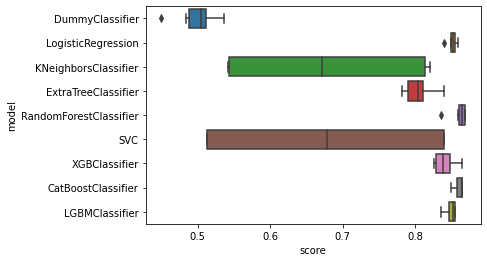

In [16]:
sns.boxplot(data=models_df, x='score', y='model') 
# RandomForestClassifier, 
# LogisticRegression,LGBMClassifier, XGBClassifier and CatBoostClassifier are the best

<AxesSubplot:xlabel='time_elapsed', ylabel='model'>

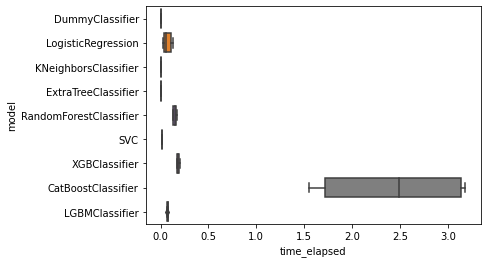

In [17]:
sns.boxplot(data=models_df, x='time_elapsed', y='model') # CatBoostClassifier is the slowest algorithm on this data set

# Evaluation

In [18]:
classifiers = [
#       LogisticRegression(max_iter=500,solver='lbfgs'), # "solver='lbfgs" ~ in order for the algorithm to perform a specific number of iterations despite finding an optimal solution
      RandomForestClassifier(),
#       XGBClassifier(use_label_encoder=False,eval_metric='mlogloss'), # "use_label_encoder=False" ~ The use of label encoder in XGBClassifier is deprecated and will be removed in a future release."
#     LGBMClassifier(verbose=-1)
]

parameters={
#     'LogisticRegression':{
#         'classifier__penalty' : ['l1', 'l2'],
#         'classifier__C' : np.logspace(-4, 4, 20),
#         'classifier__solver' : ['liblinear']},
    'RandomForestClassifier':{
        'classifier__bootstrap': [True, False],
        'classifier__max_depth': [10, 20, 30, None],
        'classifier__max_features': ['auto', 'sqrt'],       
    }
#     'XGBClassifier':{
#         'classifier__learning_rate': [0.01, 0.5],
#         'classifier__max_depth': np.arange(2, 11).tolist(),
#         'classifier__min_child_weight': np.arange(0, 50).tolist()
#     }
# ,
#     'LGBMClassifier':{
#         'n_estimators': [10000],             
#         'learning_rate': [0.01, 0.3],
#         'max_depth': [3, 12]
#     }
}


numeric_transformers = [StandardScaler()]

categorical_transformers = [OneHotEncoder(handle_unknown = 'ignore')] 


{'classifier__bootstrap': True, 'classifier__max_depth': 30, 'classifier__max_features': 'sqrt'}
[[93 17]
 [11 86]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       110
           1       0.83      0.89      0.86        97

    accuracy                           0.86       207
   macro avg       0.86      0.87      0.86       207
weighted avg       0.87      0.86      0.86       207

Wall time: 16.3 s


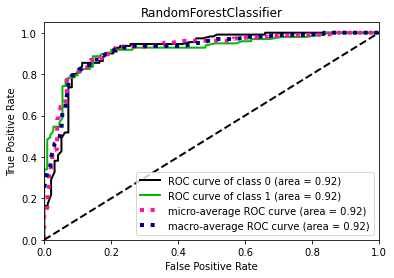

In [19]:
%%time

from sklearn.model_selection import GridSearchCV

import scikitplot as skplt #roc curve

from sklearn.metrics import classification_report


models_hypers_df = pd.DataFrame() #Space for scores

for model in classifiers:
    for num_trans in numeric_transformers:
        for cat_trans in categorical_transformers:
            
            pipe_params = {
                'preprocessor__numerical__num_trans': num_trans,
                'preprocessor__categorical__cat_trans': cat_trans,
                'classifier': model
            }
            
            
            pipe.set_params(**pipe_params)
            
            cv = GridSearchCV(pipe, parameters[model.__class__.__name__], cv=5, return_train_score=False)
                                 
            start_time = time.time()
            
            cv.fit(X_train,y_train)
                             
            end_time = time.time()
            
            
            score=cv.score(X_test,y_test)
            
            #ROC curve
            
            y_probas = cv.predict_proba(X_test)
    
            skplt.metrics.plot_roc(y_test, y_probas)
        
            plt.title(model.__class__.__name__) 
            
            print(cv.best_params_)
            
                                   
            y_pred = cv.predict(X_test)
            
            print(confusion_matrix(y_test,y_pred))
            
            print(classification_report(y_test, y_pred))
                                            
            param_dict = {
                        'model': model.__class__.__name__,
                        'num_trans': num_trans.__class__.__name__,
                        'cat_trans': cat_trans.__class__.__name__,
                        'score': cv.best_score_,
                        'final score': score,
                        'time_elapsed': end_time - start_time
            }
            
            models_hypers_df = models_hypers_df.append(pd.DataFrame(param_dict, index=[0]))
            
            
models_hypers_df.reset_index(drop=True, inplace=True)


#end-of-loops signal

#time imported above

import winsound


for i in range(5):
    winsound.Beep(frequency= 2500, duration= 500)
    time.sleep(0.3)

In [20]:
models_hypers_df


,model,num_trans,cat_trans,score,final score,time_elapsed
0,RandomForestClassifier,StandardScaler,OneHotEncoder,0.87369,0.864734,12.064204
